<a href="https://colab.research.google.com/github/JSchoonmaker/eth-data-science-course/blob/master/courses/Module%201/1-1-Motivating%20Example%20Crypto%20Punk%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python version of Omni Analytics' Data Science on the Ethereum Blockchain Module 1: Motivating Example.


## All datasets, code ideas, concepts, and text used are based on Omni Analytics' great work that can be found here: https://github.com/Omni-Analytics-Group/eth-data-science-course

### Translation from R into Python by Jeanna Schoonmaker, Oct 2021


# Let's get started

Since this notebook uses Python instead of R, we need to start with importing pandas, a Python library for data analysis. It is common practice to import pandas with the alias "pd"

In [2]:
import pandas as pd

# Load the Data

First, we set the url where the dataset can be found as the "punks_url" variable. <br>
Next, we use pandas' read_csv method to load the dataset.

In [3]:
punks_url = 'https://raw.githubusercontent.com/Omni-Analytics-Group/eth-data-science-course/master/courses/Module%201/punks.csv'

In [4]:
df_punks = pd.read_csv(punks_url, encoding='unicode_escape')

# First look at the data in Python
Use Python to look at the first few rows of data in the Punks data set. The head() function will allow you to look at the first 5 rows of the dataset. The tail() function will allow you to look at the last 5 rows of the dataset.

In [5]:
df_punks.head()

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank
0,Sold,0xf5099e,14715954,25.00,2822.0,2018-11-30,0,Girl,Female,Mid,3,3682560000%
1,Sold,0x00d7c9,10528156,1.60,386.0,2017-07-07,0,Girl,Female,Mid,3,3682560000%
2,Sold,0xc352b5,55241,0.98,320.0,2017-06-23,0,Girl,Female,Mid,3,3682560000%
3,Claimed,NaN,12800693,NaN,NaN,2017-06-23,0,Girl,Female,Mid,3,3682560000%
4,Sold,EliteCat,0xcf6165,60.00,36305.0,2020-11-30,1,Guy,Male,Dark,2,2050240500%


In [6]:
df_punks.tail()

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank
17549,Sold,TJ2010,gaus,59.0,21062.0,2020-09-27,9997,Guy,Zombie,Zombie,2,0.023188000%
17550,Claimed,NaN,TJ2010,NaN,NaN,2017-06-23,9997,Guy,Zombie,Zombie,2,0.023188000%
17551,Sold,7595170,TokenAng,15.0,9499.0,2020-12-27,9998,Girl,Female,Mid,3,1452800000%
17552,Claimed,NaN,0x73e4a2,NaN,NaN,2017-06-23,9998,Girl,Female,Mid,3,1452800000%
17553,Claimed,NaN,8269084,NaN,NaN,2017-06-23,9999,Girl,Female,Dark,2,1752960000%


# Crypto Punks Data Attributes

The command .info() gives us information about the dataframe including number of rows and name, number, and data type for each column.

In [7]:
df_punks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17554 entries, 0 to 17553
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Transaction  17554 non-null  object 
 1   From         7554 non-null   object 
 2   To           17554 non-null  object 
 3   Crypto       7554 non-null   float64
 4   USD          7554 non-null   float64
 5   Txn          17554 non-null  object 
 6   ID           17554 non-null  int64  
 7   Sex          17554 non-null  object 
 8   Type         17554 non-null  object 
 9   Skin         17554 non-null  object 
 10  Slots        17554 non-null  int64  
 11  Rank         17554 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.6+ MB


# Crypto Punks Statistical Summary

Let's summarize the value for each variable in Punks by using .describe(). <br><br>
Note that stats such as mean, min, and max are shown only for columns containing numeric data. <br><br>
Columns containing string, or text data are summarized with a count, count of unique items, the most common value (top) and the frequency at which the top value occurs.   

In [8]:
df_punks.describe(include='all')

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank
count,17554,7554,17554,7554.000000,7554.000000,17554,17554.000000,17554,17554,17554,17554.000000,17554
unique,2,682,1524,NaN,NaN,898,NaN,2,5,7,NaN,4007
top,Claimed,Hemba,12800693,NaN,NaN,2017-06-23,NaN,Guy,Male,Mid,NaN,2213293500%
freq,10000,1058,990,NaN,NaN,10019,NaN,11379,11152,5307,NaN,45
mean,NaN,NaN,NaN,2.389854,867.305033,NaN,5193.788481,NaN,NaN,NaN,2.778227,NaN
std,NaN,NaN,NaN,6.118331,2833.265913,NaN,2757.690393,NaN,NaN,NaN,0.799278,NaN
min,NaN,NaN,NaN,0.010000,0.010000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,0.300000,72.000000,NaN,2906.000000,NaN,NaN,NaN,2.000000,NaN
50%,NaN,NaN,NaN,1.000000,232.500000,NaN,5189.000000,NaN,NaN,NaN,3.000000,NaN
75%,NaN,NaN,NaN,2.900000,1003.250000,NaN,7557.000000,NaN,NaN,NaN,3.000000,NaN


# Scatterplots

Let's look at the relationship between Crypto and USD.

matplotlib and seaborn are both open source libraries for creating visualizations in python.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'USD vs. Crypto (ETH)')]

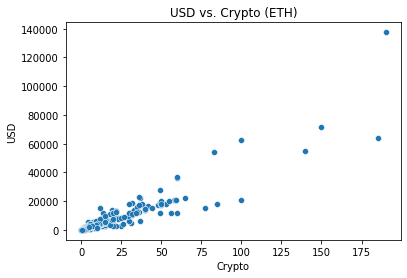

In [10]:
sns.scatterplot(x=df_punks.Crypto, y=df_punks.USD).set(title='USD vs. Crypto (ETH)')

# Another Scatterplot

[Text(0.5, 1.0, 'USD vs. Crypto (ETH)')]

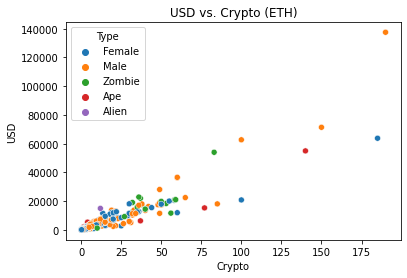

In [11]:
sns.scatterplot(x=df_punks.Crypto, y=df_punks.USD, hue = df_punks.Type).set(title='USD vs. Crypto (ETH)')

# Creating a New Variable

We will make a new variable in the Punks data set to account for the ratio between Crypto and USD that is `Ratio of Currency = USD / Crypto`.

In [12]:
df_punks['Ratio of Currency'] = df_punks['USD']/df_punks['Crypto']

# Summary of 'Ratio of Currency' Variable

One way we can interpret this is 1 ETH is worth $328.00 (the mean at the time of writing).

In [13]:
df_punks['Ratio of Currency'].describe()

count    7554.000000
mean      327.962994
std       188.430207
min         1.000000
25%       202.857143
50%       326.887464
75%       367.200000
max      1409.090909
Name: Ratio of Currency, dtype: float64

# Column Names

We can look at all of the column names found in the dataset with this method.

In [14]:
df_punks.columns

Index(['Transaction', 'From', 'To', 'Crypto', 'USD', 'Txn', 'ID', 'Sex',
       'Type', 'Skin', 'Slots', 'Rank', 'Ratio of Currency'],
      dtype='object')

# Crypto Histogram

We now plot a histogram of Crypto to see its distribution.

[Text(0.5, 1.0, 'Histogram of Crypto')]

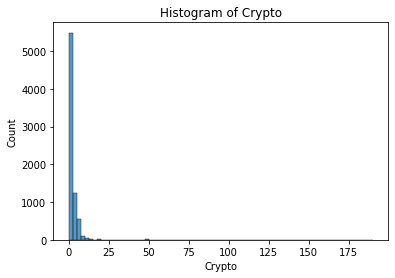

In [15]:
sns.histplot(x=df_punks.Crypto, binwidth=2.5).set(title='Histogram of Crypto') # binwidth is the length of each rectangular bar

# Finding the most expensive punk that was last sold in the sample data

We can look at the most expensive punk that was last sold by using the .loc (location) command and the .idxmax (index for the max value) command.

In [16]:
df_punks.loc[df_punks.Crypto.idxmax()]

Transaction                 Sold
From                         jmg
To                      0x7224a1
Crypto                    189.99
USD                       137522
Txn                   2020-12-30
ID                          3306
Sex                          Guy
Type                        Male
Skin                         Mid
Slots                          3
Rank                 6437574000%
Ratio of Currency        723.838
Name: 5234, dtype: object

# Average Slots By Sex
### As a breakdown: <br>
df_punks.loc - locates the values in the dataframe meeting the criteria inside the brackets <br>
df_punks.Sex == 'XX' - subsets the dataset with the rows that meet the critera<br>
'Slots' - selects the Slots column from the dataset<br>
.mean() - provides the mean

In [17]:
df_punks.loc[df_punks.Sex == 'Girl', 'Slots'].mean()

2.763076923076923

In [18]:
df_punks.loc[df_punks.Sex == 'Guy', 'Slots'].mean()

2.7864487213287634

# Combine Types

We can label Alien, Ape and Zombie as non_human, and similarly we can label Female and Male as human.

This code works by creating new columns "Non_human" and "Human" by selecting the rows that contain "Alien", "Ape", "Zombie" and "Female", "Male" in the Type column.

Note the | operator is interpreted as 'or', so the non_human column assignment looks at the Type column in the Punks data and assigns a 'True' value if the Punk Type is Alien OR Ape OR Zombie. Similarly, the Punk is assigned a 'True' value in the Human column if the Type is Female OR Male. 

In [19]:
df_punks['Non_human'] = (df_punks['Type'] == 'Alien') | (df_punks['Type'] == 'Ape') | (df_punks['Type'] == 'Zombie')

In [20]:
df_punks

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank,Ratio of Currency,Non_human
0,Sold,0xf5099e,14715954,25.00,2822.0,2018-11-30,0,Girl,Female,Mid,3,3682560000%,112.880000,False
1,Sold,0x00d7c9,10528156,1.60,386.0,2017-07-07,0,Girl,Female,Mid,3,3682560000%,241.250000,False
2,Sold,0xc352b5,55241,0.98,320.0,2017-06-23,0,Girl,Female,Mid,3,3682560000%,326.530612,False
3,Claimed,NaN,12800693,NaN,NaN,2017-06-23,0,Girl,Female,Mid,3,3682560000%,NaN,False
4,Sold,EliteCat,0xcf6165,60.00,36305.0,2020-11-30,1,Guy,Male,Dark,2,2050240500%,605.083333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,Sold,TJ2010,gaus,59.00,21062.0,2020-09-27,9997,Guy,Zombie,Zombie,2,0.023188000%,356.983051,True
17550,Claimed,NaN,TJ2010,NaN,NaN,2017-06-23,9997,Guy,Zombie,Zombie,2,0.023188000%,NaN,True
17551,Sold,7595170,TokenAng,15.00,9499.0,2020-12-27,9998,Girl,Female,Mid,3,1452800000%,633.266667,False
17552,Claimed,NaN,0x73e4a2,NaN,NaN,2017-06-23,9998,Girl,Female,Mid,3,1452800000%,NaN,False


In [21]:
df_punks['Human'] = (df_punks['Type'] == 'Female')| (df_punks['Type'] == 'Male')

In [22]:
df_punks

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank,Ratio of Currency,Non_human,Human
0,Sold,0xf5099e,14715954,25.00,2822.0,2018-11-30,0,Girl,Female,Mid,3,3682560000%,112.880000,False,True
1,Sold,0x00d7c9,10528156,1.60,386.0,2017-07-07,0,Girl,Female,Mid,3,3682560000%,241.250000,False,True
2,Sold,0xc352b5,55241,0.98,320.0,2017-06-23,0,Girl,Female,Mid,3,3682560000%,326.530612,False,True
3,Claimed,NaN,12800693,NaN,NaN,2017-06-23,0,Girl,Female,Mid,3,3682560000%,NaN,False,True
4,Sold,EliteCat,0xcf6165,60.00,36305.0,2020-11-30,1,Guy,Male,Dark,2,2050240500%,605.083333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,Sold,TJ2010,gaus,59.00,21062.0,2020-09-27,9997,Guy,Zombie,Zombie,2,0.023188000%,356.983051,True,False
17550,Claimed,NaN,TJ2010,NaN,NaN,2017-06-23,9997,Guy,Zombie,Zombie,2,0.023188000%,NaN,True,False
17551,Sold,7595170,TokenAng,15.00,9499.0,2020-12-27,9998,Girl,Female,Mid,3,1452800000%,633.266667,False,True
17552,Claimed,NaN,0x73e4a2,NaN,NaN,2017-06-23,9998,Girl,Female,Mid,3,1452800000%,NaN,False,True


#Average Slots by Types

Finding the mean of each based on the newly created Types


In [25]:
df_punks.loc[df_punks['Non_human'] == True, 'Slots'].mean()

2.2246696035242293

In [27]:
df_punks.loc[df_punks['Human'] == True, 'Slots'].mean()

2.7854793097477923

We can see that **human** type punks have more slots than **non_human** type punks.

#Box Plots

We could compare the slots for the different types of punks with a side by side boxplot.

[Text(0.5, 1.0, 'Box Plot of Slots by Types')]

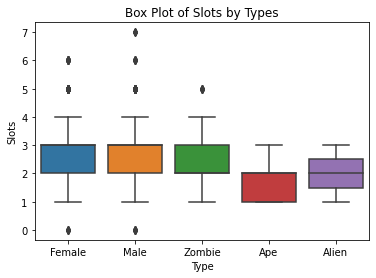

In [28]:
sns.boxplot(x=df_punks.Type, y=df_punks.Slots).set(title='Box Plot of Slots by Types')

#Your Turn

Try playing with chunks of code from this session to further investigate the Punks data:

1. Summarize the Crypto values.
2. Make a boxplot comparing Crypto for different Skins.
3. Find the average slots for the pale (Alien, Albino, Light) and dark (Dark, Mid).

#Answers

#1. Summarize the Crypto values.

In [30]:
df_punks['Crypto'].describe()

count    7554.000000
mean        2.389854
std         6.118331
min         0.010000
25%         0.300000
50%         1.000000
75%         2.900000
max       189.990000
Name: Crypto, dtype: float64

#2. Make a boxplot comparing Crypto for different Skins.

[Text(0.5, 1.0, 'Box Plot of Crypto by Skin')]

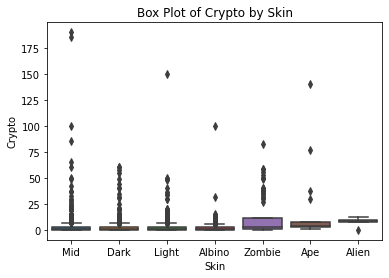

In [31]:
sns.boxplot(x=df_punks.Skin, y=df_punks.Crypto).set(title='Box Plot of Crypto by Skin')

#3. Find the average slots for the pale (Alien, Albino, Light) and dark (Dark, Mid).

In [32]:
df_punks['Pale'] = (df_punks['Skin'] == 'Alien') | (df_punks['Skin'] == 'Albino') | (df_punks['Skin'] == 'Light')

In [33]:
df_punks['Dark'] = (df_punks['Skin'] == 'Dark') | (df_punks['Skin'] == 'Mid')

In [37]:
df_punks.head()

,Transaction,From,To,Crypto,USD,Txn,ID,Sex,Type,Skin,Slots,Rank,Ratio of Currency,Non_human,Human,Pale,Dark
0,Sold,0xf5099e,14715954,25.00,2822.0,2018-11-30,0,Girl,Female,Mid,3,3682560000%,112.880000,False,True,False,True
1,Sold,0x00d7c9,10528156,1.60,386.0,2017-07-07,0,Girl,Female,Mid,3,3682560000%,241.250000,False,True,False,True
2,Sold,0xc352b5,55241,0.98,320.0,2017-06-23,0,Girl,Female,Mid,3,3682560000%,326.530612,False,True,False,True
3,Claimed,NaN,12800693,NaN,NaN,2017-06-23,0,Girl,Female,Mid,3,3682560000%,NaN,False,True,False,True
4,Sold,EliteCat,0xcf6165,60.00,36305.0,2020-11-30,1,Guy,Male,Dark,2,2050240500%,605.083333,False,True,False,True


In [38]:
df_punks.loc[df_punks['Pale'] == True, 'Slots'].mean()

2.748796498905908

In [39]:
df_punks.loc[df_punks['Dark'] == True, 'Slots'].mean()

2.80833412796796